<a href="https://colab.research.google.com/github/itspritish/util/blob/master/kmeans_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.DataFrame({'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
                   'y':[39.36,30,52,54,56,46,55,59,63,70,66,63,58,23,14,8,19,7,24]})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

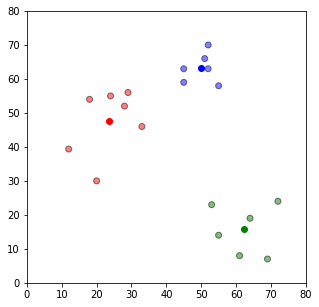

In [0]:
colmap = {1:'r', 2:'g', 3:'b'}
fig = plt.figure(figsize=(5,5))
colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df['x'], df['y'], color=colors1, alpha=0.5, edgecolor='k')
for i, centroid in enumerate(centroids):
  plt.scatter(*centroid, color=colmap[i+1])

plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

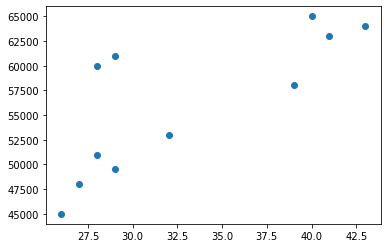

In [50]:
dfx = pd.read_csv('https://raw.githubusercontent.com/itspritish/util/master/kmeans.csv')
plt.scatter(df1['Age'], df1['Income($)'])


In [64]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(dfx[['Age','Income($)']])
y_pred

dfx['cluster']=y_pred
dfx.head()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


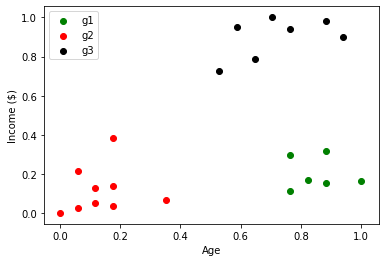

In [65]:
df1 = dfx[dfx.cluster==0]
df2 = dfx[dfx.cluster==1]
df3 = dfx[dfx.cluster==2]


plt.scatter(df1.Age, df1['Income($)'], color='green', label='g1')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='g2')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='g3')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

# The below plotting is with mixed colors coz the the clustering is messed up. Main reason being data is at different scales.
#Lets rescale it

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(dfx[['Income($)']])
dfx['Income($)'] = scaler.transform(dfx[['Income($)']])


scaler.fit(dfx[['Age']])
dfx['Age'] = scaler.transform(dfx[['Age']])

dfx.head()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [66]:
y_pred = kmeans.fit_predict(dfx[['Age','Income($)']])
y_pred

dfx['cluster']=y_pred
dfx.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


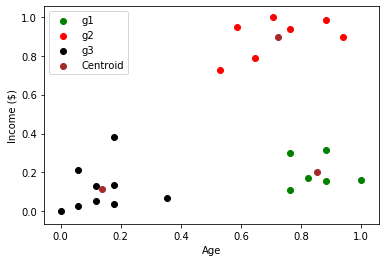

In [68]:
df1 = dfx[dfx.cluster==0]
df2 = dfx[dfx.cluster==1]
df3 = dfx[dfx.cluster==2]


plt.scatter(df1.Age, df1['Income($)'], color='green', label='g1')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='g2')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='g3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],color='brown', label='Centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()